# 1. Import and Functions

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle


import seaborn as sns
from matplotlib.lines import Line2D


import pandas as pd
import matplotlib.patches
import math

plt.rcParams["legend.markerscale"] = 2.3
plt.rcParams.update({'font.size': 10})


def value_from_dict(dicts):
    lists = [dicts[key] for key in dicts.keys()]
    return lists


def rotate_vector(data, angle):
    # make rotation matrix
    theta = np.radians(angle)
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))
    # rotate data vector
    #data = data[:, :2]
    rotated_vector = data.dot(rotation_matrix)
    # return index of elbow
    return rotated_vector

def flip_vector_about_y(data):
    # Reflection matrix about the y = 0 axis
    #reflection_matrix = np.array([[1, 0], [0, -1]])
    # Reflection matrix about the x = 0 axis
    reflection_matrix = np.array([[-1, 0], [0, 1]])
    
    # Apply the reflection matrix to the data
    flipped_vector = data.dot(reflection_matrix)
    
    return flipped_vector

def value_from_dict(dicts):
    lists = [dicts[key] for key in dicts.keys()]
    return lists

def load_json_create_dicts_and_lists(file_path):
    # Load the JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Create individual dictionaries and lists
    for key, value in data.items():
        globals()[key] = value
        list_name = f"{key}"
        globals()[list_name] = value_from_dict(value)
    
    #print("Created dictionaries and lists:")
    #for key in data.keys():
        #print(f"- Dictionary: {key}")
        #print(f"- List: {key}")
        
        
def num_to_per(dicts):
    
    dicts2 = {}
    for index, key in enumerate(dicts):
        array = []
        for lists in dicts[key]:
            row = []
            for item in lists:
                item1 = item * 100/np.sum(lists)
                if item1 ==100:
                    print(round(item1))
                    row.append(int(item1))
                else:
                    row.append(round(item1))
            array.append(row)
        dicts2[key]=array
    return dicts2

# Function to create scatter plot
def create_scatter(ax, feature, target, rotate=False, flip=False):
    hue = [class_dict[item] for item in target]
    size = [class_dict[item] for item in target]
    if rotate:
        feature = rotate_vector(feature, 0)
    if flip:
        feature = flip_vector_about_y(feature)
    scatter = sns.scatterplot(ax=ax, x=feature[:, 0], y=feature[:, 1],
                              style=[class_dict[item] for item in target],
                              markers=markers, hue=hue, size=size, sizes=sizes,
                              palette=colors, edgecolor='black', linewidth=0.5)
    scatter.legend_.remove()
    return scatter

# 2. Training Modality Figure

In [3]:
file_path = 'Results/ImageNet_Sequential.json' 
load_json_create_dicts_and_lists(file_path)

print("imagenet_train3:", imagenet_train3)
print("previous_test_std3:", previous_test_std3)

imagenet_train3: [0.98, 0.95, 0.98, 0.95, 0.97]
previous_test_std3: [0.02, 0.05, 0.05, 0.06, 0.07]


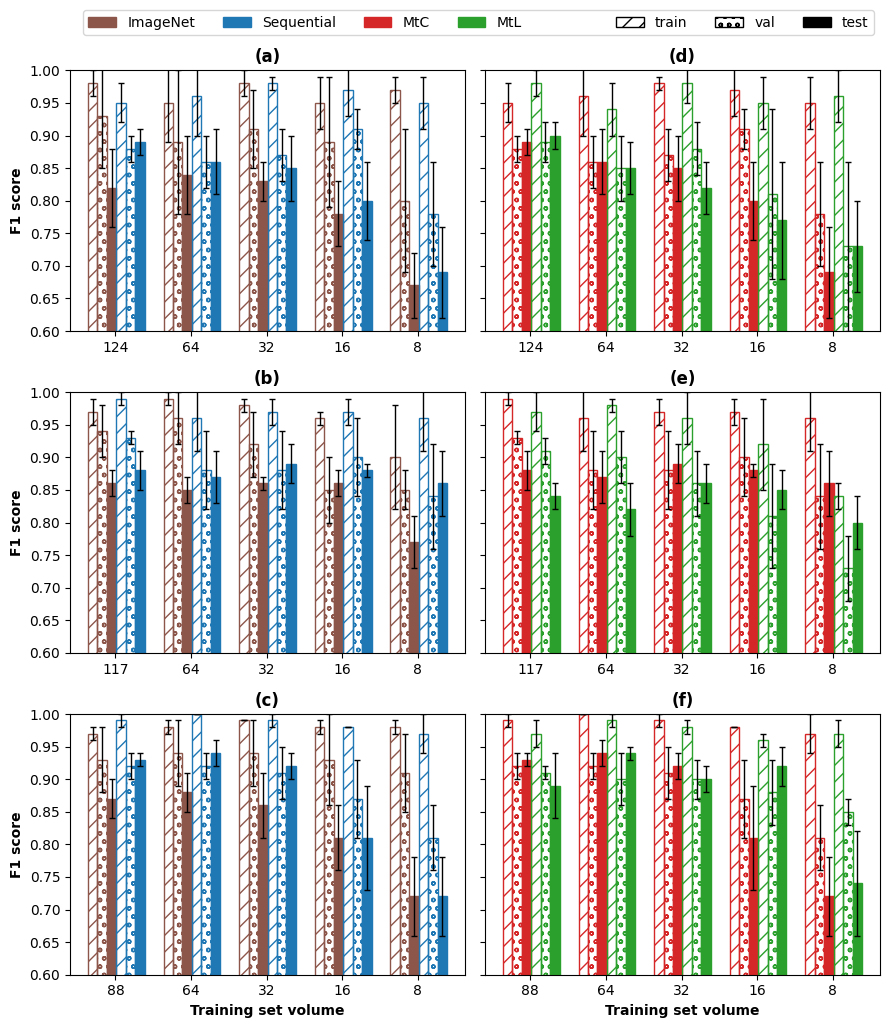

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def create_bar_plot(ax, data,dataset_std, colors, hatches, labels):
    ind = np.arange(len(data[0]))
    width = 0.125
    
    for i, dataset in enumerate(data):
        x = ind + width * i
        #ax.bar(x, dataset['values'], width, yerr=dataset['std'],
        ax.bar(x, dataset, width, yerr=dataset_std[i], 
               label=labels[i], facecolor=colors[i][0], edgecolor=colors[i][1], 
               hatch=hatches[i], error_kw=dict(ecolor='black', lw=1, capsize=2, capthick=1))

def setup_axes(ax, title, xlabel, ylabel, ylim, xticks, xticklabels):
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(xlabel, fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_ylim(ylim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

def create_figure():
    rows, columns = 3, 2
    fig, axs = plt.subplots(rows, columns, sharey=True, figsize=(9, 10))
    
    datasets = [
        [imagenet_train3, imagenet_val3, imagenet_test3, previous_train3, previous_val3, previous_test3],
        [MtC_train3, MtC_val3, MtC_test3, MtL_train3, MtL_val3, MtL_test3],
        [imagenet_train4, imagenet_val4, imagenet_test4, previous_train4, previous_val4, previous_test4],
        [MtC_train4, MtC_val4, MtC_test4, MtL_train4, MtL_val4, MtL_test4],
        [imagenet_train5, imagenet_val5, imagenet_test5, previous_train5, previous_val5, previous_test5],
        [MtC_train5, MtC_val5, MtC_test5, MtL_train5, MtL_val5, MtL_test5]
    ]
    datasets_std = [
        [imagenet_train_std3, imagenet_val_std3, imagenet_test_std3, previous_train_std3, previous_val_std3, previous_test_std3],
        [MtC_train_std3, MtC_val_std3, MtC_test_std3, MtL_train_std3, MtL_val_std3, MtL_test_std3],
        [imagenet_train_std4, imagenet_val_std4, imagenet_test_std4, previous_train_std4, previous_val_std4, previous_test_std4],
        [MtC_train_std4, MtC_val_std4, MtC_test_std4, MtL_train_std4, MtL_val_std4, MtL_test_std4],
        [imagenet_train_std5, imagenet_val_std5, imagenet_test_std5, previous_train_std5, previous_val_std5, previous_test_std5],
        [MtC_train_std5, MtC_val_std5, MtC_test_std5, MtL_train_std5, MtL_val_std5, MtL_test_std5]
    ]
    
    colors1 = [('none', 'tab:brown'), ('none', 'tab:brown'), ('tab:brown', 'tab:brown'),
              ('none', 'tab:blue'), ('none', 'tab:blue'), ('tab:blue', 'tab:blue')]
    colors2 = [('none', 'tab:red'), ('none', 'tab:red'), ('tab:red', 'tab:red'),
              ('none', 'tab:green'), ('none', 'tab:green'), ('tab:green', 'tab:green')]
    hatches = ['//', 'oo', None, '//', 'oo', None]
    labels = ['train', 'val', 'test', 'train', 'val', 'test']
    
    for i in range(rows):
        for j in range(columns):
            if j==0:
                create_bar_plot(axs[i, j], datasets[i*columns + j],datasets_std[i*columns + j], colors1, hatches, labels)
            elif j==1:
                create_bar_plot(axs[i, j], datasets[i*columns + j],datasets_std[i*columns + j], colors2, hatches, labels)
    
    setup_axes(axs[0, 0], '(a)', '', 'F1 score', (0.6, 1.0), np.arange(5)+0.3, ('124', '64', '32', '16', '8'))
    setup_axes(axs[1, 0], '(b)', '', 'F1 score', (0.6, 1.0), np.arange(5)+0.3, ('117', '64', '32', '16', '8'))
    setup_axes(axs[2, 0], '(c)', 'Training set volume', 'F1 score', (0.6, 1.0), np.arange(5)+0.3, ('88', '64', '32', '16', '8'))
    setup_axes(axs[0, 1], '(d)', '', '', (0.6, 1.0), np.arange(5)+0.3, ('124', '64', '32', '16', '8'))
    setup_axes(axs[1, 1], '(e)', '', '', (0.6, 1.0), np.arange(5)+0.3, ('117', '64', '32', '16', '8'))
    setup_axes(axs[2, 1], '(f)', 'Training set volume', '', (0.6, 1.0), np.arange(5)+0.3, ('88', '64', '32', '16', '8'))
    
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor=c, edgecolor=e, label=l)
        for c, e, l in zip(['tab:brown', 'tab:blue', 'tab:red', 'tab:green', 'none', 'none', 'none', 'black'],
                           ['tab:brown', 'tab:blue', 'tab:red', 'tab:green', 'none', 'black', 'black', 'black'],
                           ['ImageNet', 'Sequential', 'MtC', 'MtL', '', 'train', 'val', 'test'])
    ]
    legend_elements[5].set_hatch('//')
    legend_elements[6].set_hatch('oo')
    
    fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.09, 1.03), ncol=8)
    
    fig.tight_layout()
    plt.savefig("Results/TMD_training_modality.pdf", format="pdf", bbox_inches="tight")
    plt.show()

create_figure()

# 3. Confusion Matrix Figure

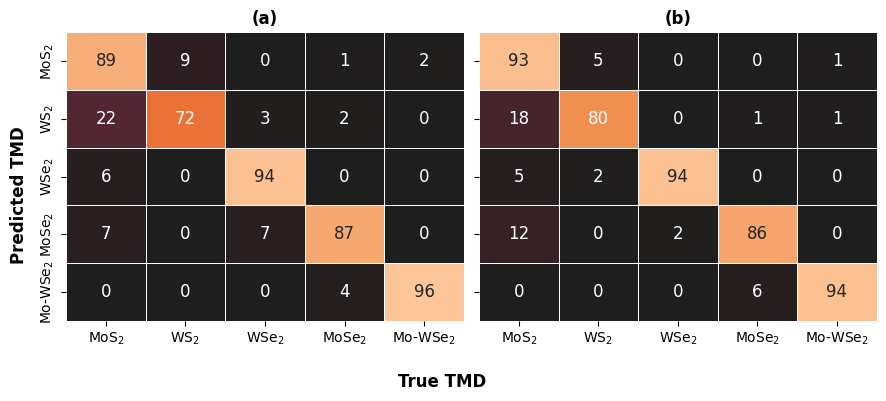

In [5]:
with open("Results/Confusion_Matrix_data.pkl", "rb") as fp:   # Unpickling
  dicts_T = pickle.load(fp)

#dicts_T = {'MtC':[[41.8, 4.0, 0.0, 0.4, 0.8], [4.0, 13.0, 0.6, 0.4, 0.0], [0.8, 0.0, 12.2, 0.0, 0.0], [0.8, 0.0, 0.8, 10.4, 0.0], [0.0, 0.0, 0.0, 0.6, 13.4]], 'MtL':[[42.6, 2.2, 0.2, 0.2, 0.6], [3.2, 14.2, 0.0, 0.2, 0.2], [0.6, 0.2, 12.2, 0.0, 0.0], [1.4, 0.0, 0.2, 10.2, 0.0], [0.0, 0.0, 0.0, 0.8, 13.2]]}

title_dict = {'MtC': '(a)', 'MtL': '(b)'}
dicts2 = num_to_per(dicts_T)

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, sharex=True, sharey=True, figsize=(9, 4))
index=0
keys = [item for item in dicts2.keys()]
#for rows in range(num_rows):
for cols in range(num_cols):
    #if index < 8:

    key=keys[index] 

    #df_cm = pd.DataFrame(dicts2[key].round(), range(3), range(3))
    df_cm = dicts2[key]
    #df_cm.set_option('display.float_format', lambda x: f'{x:.0f}')
    ax = axes[cols]
    #sn.set(ax=ax,font_scale=1.4)
    ax.set_title(title_dict[key],fontweight='bold')

    #if index==2 or index==5 or index==8:
    sns.heatmap(df_cm, ax=ax,annot=True,fmt='g', center=0,linewidth=.5, annot_kws={"size": 12},cbar=False,
                  xticklabels=['MoS$_2$', 'WS$_2$', 'WSe$_2$', 'MoSe$_2$', 'Mo-WSe$_2$'], yticklabels=['MoS$_2$', 'WS$_2$', 'WSe$_2$', 'MoSe$_2$', 'Mo-WSe$_2$'],vmin=0, vmax=100)

    #else:
     #   sn.heatmap(df_cm, ax=ax,annot=True,fmt='g', center=0,linewidth=.5, annot_kws={"size": 16},cbar=False,
    #              xticklabels=['900', '950', '1000'], yticklabels=['900', '950', '1000'])

    index += 1

fig.supylabel('Predicted TMD',fontweight='bold')
fig.supxlabel('True TMD',fontweight='bold')
fig.tight_layout()
plt.savefig("Results/TMD_confusion_matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 4 Latent Feature Embedding Figure

In [6]:
# File path
features_emb_path = "Results/Features_Embedding_multilabel.pkl"

# Load the pickle file
df_features_emb = pd.read_pickle(features_emb_path)

# Define a list of dataset names
dataset_names = ['2', '3', '4', '5', '2-3', '2-4', '2-5']

# Create dictionaries to store targets and features
targets = {}
features = {}

# Load targets and features for each dataset
for name in dataset_names:
    targets[name] = df_features_emb[f'{name}-target']
    features[name] = df_features_emb[f'{name}-feature']

# Print the first 10 elements of target2 as an example
print(f"First 10 elements of target2: {targets['2'][:10]}")


target2, feature2 = targets['2'], features['2']
target3, feature3 = targets['3'], features['3']
target4, feature4 = targets['4'], features['4']
target5, feature5 = targets['5'], features['5']
target2_3, feature2_3 = targets['2-3'], features['2-3']
target2_4, feature2_4 = targets['2-4'], features['2-4']
target2_5, feature2_5 = targets['2-5'], features['2-5']

First 10 elements of target2: [0 1 0 0 0 0 1 0 0 0]


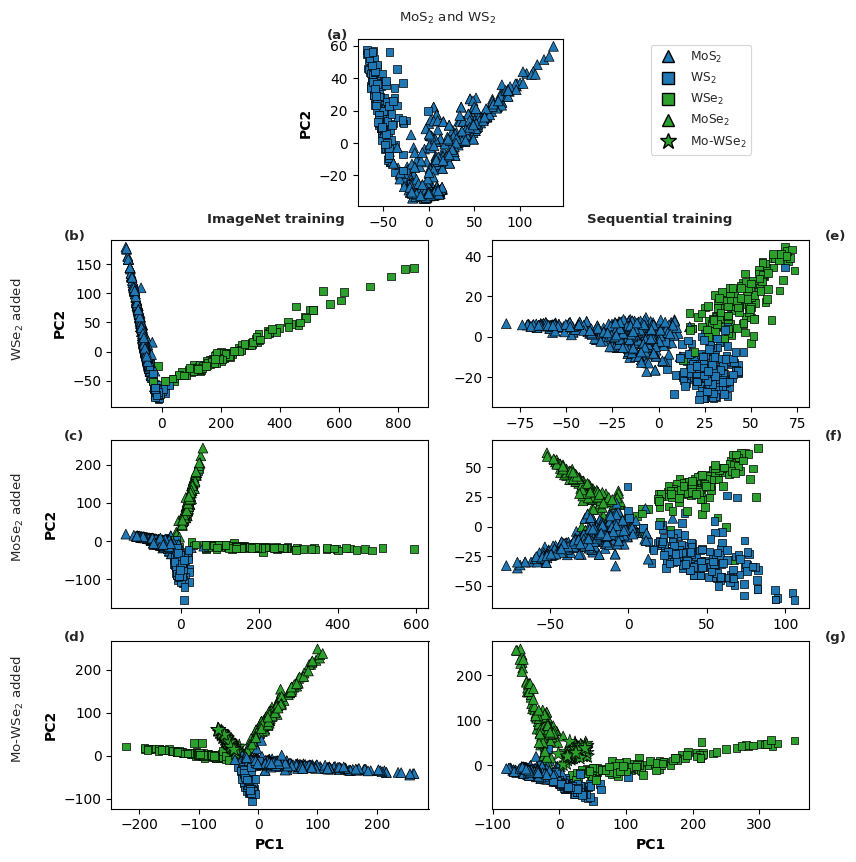

In [7]:

# Define classes, colors, markers, and sizes
class_dict = {0:'MoS2', 1:'WS2', 2:'WSe2', 3:'MoSe2', 4:'Mo-WSe2'}
colors = {'MoS2': 'tab:blue', 'WS2': 'tab:blue', 'WSe2': 'tab:green', 'MoSe2': 'tab:green', 'Mo-WSe2': 'tab:green'}
markers = {'MoS2': "^", 'WS2': "s", 'WSe2': "s", 'MoSe2': "^", 'Mo-WSe2': "*"}
sizes = {'MoS2':50, 'WS2':30, 'WSe2':30, 'MoSe2':50, 'Mo-WSe2':120}

# Set up the plot
fig = plt.figure(figsize=(9, 10))
ax1 = plt.subplot2grid((4, 3), (0, 1))
ax00 = plt.subplot2grid((4, 3), (0, 0))
ax02 = plt.subplot2grid((4, 3), (0, 2))
ax2, ax3 = plt.subplot2grid((4, 2), (1, 0)), plt.subplot2grid((4, 2), (1, 1))
ax4, ax5 = plt.subplot2grid((4, 2), (2, 0)), plt.subplot2grid((4, 2), (2, 1))
ax6, ax7 = plt.subplot2grid((4, 2), (3, 0)), plt.subplot2grid((4, 2), (3, 1))

# Set plot style
sns.reset_orig()
sns.set_context("paper")
sns.set_style("ticks")


# Create scatter plots
zero_zero = create_scatter(ax1, feature2[:, :2], target2, rotate=True)
one_zero = create_scatter(ax2, feature3[:, :2], target3)
two_zero = create_scatter(ax4, feature4[:, :2], target4)
three_zero = create_scatter(ax6, feature5[:, :2], target5)
one_one = create_scatter(ax3, feature2_3[:, :2], target2_3, flip=True)
two_one = create_scatter(ax5, feature2_4[:, :2], target2_4)
three_one = create_scatter(ax7, feature2_5[:, :2], target2_5, rotate=True)

# Create legend
custom1 = [Line2D([], [], marker=markers[k], markersize=8 if k != 'Mo-WSe2' else 12,
                  color=colors[k], linestyle='None', markeredgecolor='black',
                  markeredgewidth=1) for k in class_dict.values()]

# Add legend
ax02.legend(custom1, ['MoS$_2$', 'WS$_2$', 'WSe$_2$', 'MoSe$_2$', 'Mo-WSe$_2$'],
            bbox_to_anchor=(0.2, 1), loc='upper left')
ax00.axis('off')
ax02.axis('off')

# Add labels
def add_label(ax, label, x, y):
    ax.text(x, y, label, fontweight='bold', transform=ax.transAxes)

add_label(ax1, '(a)', -0.15, 1.0)
add_label(ax2, '(b)', -0.15, 1.0)
add_label(ax4, '(c)', -0.15, 1.0)
add_label(ax6, '(d)', -0.15, 1.0)
add_label(ax3, '(e)', 1.05, 1.0)
add_label(ax5, '(f)', 1.05, 1.0)
add_label(ax7, '(g)', 1.05, 1.0)

# Add titles
ax1.text(0.2, 1.1, 'MoS$_2$ and WS$_2$', transform=ax1.transAxes)
ax2.text(0.3, 1.1, 'ImageNet training', transform=ax2.transAxes, fontweight='bold')
ax3.text(0.3, 1.1, 'Sequential training', transform=ax3.transAxes, fontweight='bold')

# Add side labels
def add_side_label(ax, label):
    ax.text(-0.32, 0.3, label, transform=ax.transAxes, rotation=90)

add_side_label(ax2, 'WSe$_2$ added')
add_side_label(ax4, 'MoSe$_2$ added')
add_side_label(ax6, 'Mo-WSe$_2$ added')

# Set axis labels
ax6.set_xlabel('PC1', fontweight='bold')
ax7.set_xlabel('PC1', fontweight='bold')
for ax in [ax1, ax2, ax4, ax6]:
    ax.set_ylabel('PC2', fontweight='bold')

# Save and show plot
plt.savefig("Results/TMD_MtL_pca.pdf", format="pdf", bbox_inches="tight")
plt.show()